In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Representação Gráfica das ultimas olimpiadas

In [4]:
file_rio = "./database/Rio2016.xlsx"
file_tokyo = "./database/Tokyo2020.xlsx"

rio_df = pd.read_excel(file_rio)
tokyo_df = pd.read_excel(file_tokyo)

In [5]:
tokyo_df.head(5)

,Header,Posição,País,Ouro,Prata,Bronze,Total
0,Tokyo 2020,1,Estados Unidos,39,41,33,113
1,Tokyo 2020,2,China,38,32,18,88
2,Tokyo 2020,3,Japão,27,14,17,58
3,Tokyo 2020,4,Reino Unido,22,21,22,65
4,Tokyo 2020,5,ROC,20,28,23,71


In [60]:
rio_df.head(5)

,Header,Posição,País,Ouro,Prata,Bronze,Total
0,Rio 2016,1,Estados Unidos,46,37,38,121
1,Rio 2016,2,Reino Unido,27,23,17,67
2,Rio 2016,3,China,26,18,26,70
3,Rio 2016,4,Rússia,19,18,19,56
4,Rio 2016,5,Alemanha,17,10,15,42


#### Gráfico de linha

representar Eua, China, Japão, Reino Unido e Brasil em comparação com a ultima olimpiada.

In [18]:
grupo2020_df = tokyo_df[["País", "Ouro","Prata","Bronze","Total"]].copy()
grupo2020_df = grupo2020_df.loc[grupo2020_df["País"].isin(["Estados Unidos","China","Reino Unido","Japão","Brasil"])]
grupo2020_df = grupo2020_df.set_index("País")
display(grupo2020_df)

#adicionar informações do outro dataframe
grupo2016_df = rio_df.loc[:,["País", "Ouro","Prata","Bronze","Total"]].copy()
grupo2016_df = grupo2016_df.loc[grupo2016_df["País"].isin(["Estados Unidos","Reino Unido","China","Japão","Brasil"])]
grupo2016_df


,Ouro,Prata,Bronze,Total
País,,,,
Estados Unidos,39,41,33,113
China,38,32,18,88
Japão,27,14,17,58
Reino Unido,22,21,22,65
Brasil,7,6,8,21


,País,Ouro,Prata,Bronze,Total
0,Estados Unidos,46,37,38,121
1,Reino Unido,27,23,17,67
2,China,26,18,26,70
5,Japão,12,8,21,41
12,Brasil,7,6,6,19


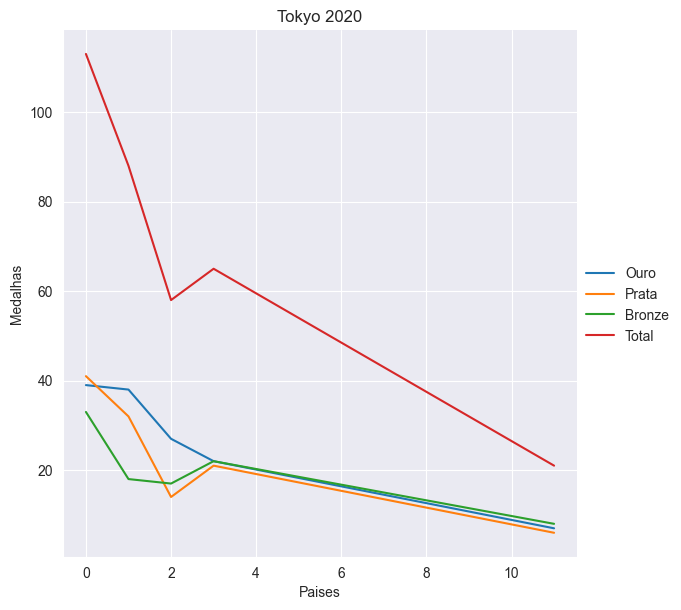

In [104]:

sns.set_style("darkgrid")
sns.relplot(grupo2020_df, kind="line",dashes=False, height= 6)

plt.title("Tokyo 2020")
plt.ylabel("Medalhas")
plt.xlabel("Paises")
plt.show()

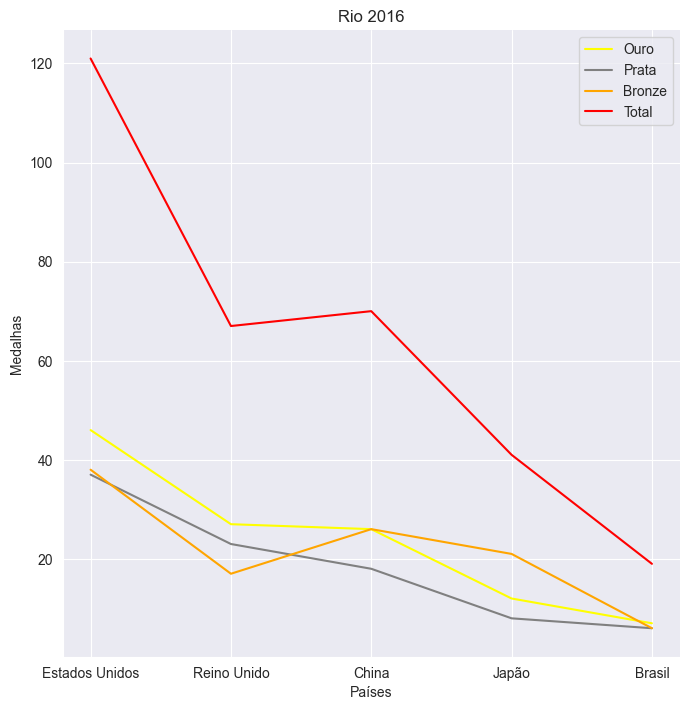

In [55]:
sns.set_style("darkgrid")
# Criar uma grade de subplots
grid = sns.FacetGrid(grupo2016_df, height=7, aspect=1)
# Plotar as linhas para cada variável
grid.map(sns.lineplot, "País", "Ouro", color="yellow", label = "Ouro")
grid.map(sns.lineplot, "País", "Prata", color="gray", label = "Prata")
grid.map(sns.lineplot, "País", "Bronze", color="orange", label = "Bronze")
grid.map(sns.lineplot, "País", "Total", color="red", label = "Total")
# Configurar título e rótulos dos eixos
plt.title("Rio 2016")
plt.ylabel("Medalhas")
plt.xlabel("Países")
# Exibir a legenda
plt.legend()
# Mostrar o gráfico
plt.show()

Grafico de barras com total de medalhas 2020

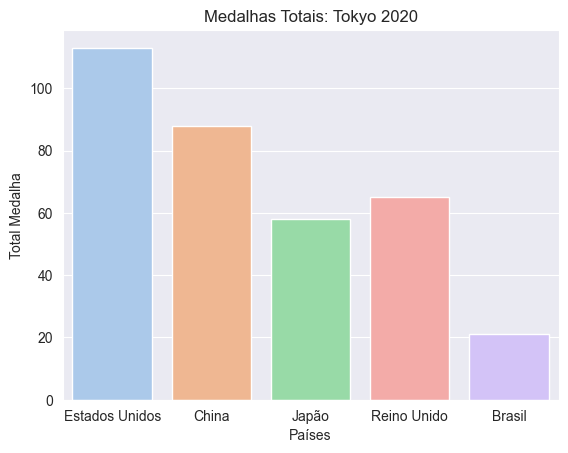

In [69]:
grupo2020_df = tokyo_df[["País", "Ouro","Prata","Bronze","Total"]].copy()
grupo2020_df = grupo2020_df.loc[grupo2020_df["País"].isin(["Estados Unidos","China","Reino Unido","Japão","Brasil"])]

sns.barplot(grupo2020_df, x = "País", y = "Total", palette= "pastel")
plt.title("Medalhas Totais: Tokyo 2020")
plt.ylabel("Total Medalha")
plt.xlabel("Países")
plt.show()

Barras invertidas (apenas trocar a ordem dos eixos)

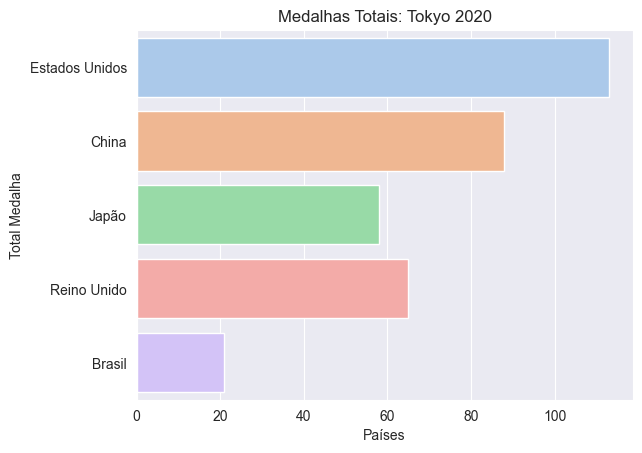

In [68]:
sns.barplot(grupo2020_df, y = "País", x = "Total", palette= "pastel")
plt.title("Medalhas Totais: Tokyo 2020")
plt.ylabel("Total Medalha")
plt.xlabel("Países")
plt.show()

Gráfico de Setores (Pizza)

representar medalhas obtidas dos Estados Unidos.

In [89]:
#selecionar país
eua = grupo2020_df.query("País =='Estados Unidos'")
#promover pais pra index
eua = eua.set_index("País")
#remover total
eua = eua.drop(columns="Total")
#Usar a transposta
eua = eua.T
eua


País,Estados Unidos
Ouro,39
Prata,41
Bronze,33


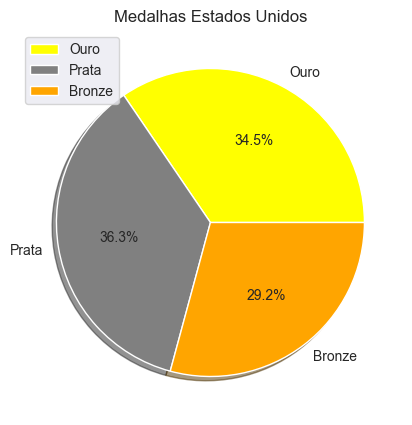

In [103]:
arrayColor = ["yellow","gray","orange"]
plt.figure(figsize=(8,5))
plt.pie(eua["Estados Unidos"], labels = eua.index, autopct="%1.1f%%", colors = arrayColor, shadow= True)
plt.title("Medalhas Estados Unidos")
plt.legend()
plt.show()